This script contains the following points:
1. Import libraries and data (df_customers & df_ords_prods_merge)
2. Creating a bar chart
3. Creating a histogram and scatterplot
4. Creating a line chart with a sample subset
5. Creating a histogram of 'order_time_of_day' column
6. Creating a bar chart from the 'loyalty_flag' column
7. Checking for difference in expenditures based on time of day
8. Exploring customer demographics with line chart and scatterplot


01. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r'C:\Users\polly\Documents\Instacart Basket Analysis'
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))  

In [3]:
# Check shape of dataframe
df_ords_prods_all.shape

(32404859, 33)

In [4]:
# Check output of dataframe
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,surname,gender,state,age,date_joined,number_of_dependents,fam_status,income,_merge
0,2539329,1,1,2,8,-1.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
# Check statistics of dataframe
df_ords_prods_all.describe()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_days_since_prior_order,age,number_of_dependents,income
count,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,32404859.0,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,32404859.0,3.240486e+07,3.240486e+07,3.240486e+07
mean,1.710745e+06,1.029372e+05,1.714230e+01,2.738867e+00,1.342515e+01,NaN,2.559866e+04,8.352547e+00,5.895873e-01,6.449111e+01,9.919792e+00,7.566404e+00,3.305217e+01,1.004174e+01,NaN,4.946527e+01,1.501896e+00,9.943773e+04
std,9.872988e+05,5.946610e+04,1.753532e+01,2.090077e+00,4.246380e+00,0.0,1.408400e+04,7.127071e+00,4.919087e-01,4.843815e+01,6.281485e+00,4.110642e+00,2.515525e+01,8.321326e+01,0.0,1.848558e+01,1.118865e+00,4.305727e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.0,1.000000e+00,1.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.0,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559470e+05,5.142200e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.0,1.354400e+04,3.000000e+00,0.000000e+00,2.400000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387299e+00,6.0,3.300000e+01,1.000000e+00,6.700400e+04
50%,1.711049e+06,1.026160e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.0,2.530200e+04,6.000000e+00,1.000000e+00,7.900000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,7.0,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565499e+06,1.543890e+05,2.400000e+01,5.000000e+00,1.600000e+01,14.0,3.794700e+04,1.100000e+01,1.000000e+00,1.000000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,12.0,6.500000e+01,3.000000e+00,1.279120e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,1.270000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500543e+04,30.0,8.100000e+01,3.000000e+00,5.939010e+05


In [6]:
# Check datatypes 
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int32   
 1   user_id                        int32   
 2   order_number                   int8    
 3   orders_day_of_week             int8    
 4   order_time_of_day              int8    
 5   days_since_prior_order         float16 
 6   product_id                     int32   
 7   add_to_cart_order              int32   
 8   reordered                      int8    
 9   product_name                   object  
 10  aisle_id                       int8    
 11  department_id                  int8    
 12  prices                         float32 
 13  price_range_loc                object  
 14  busiest_day                    object  
 15  busiest_day_new                object  
 16  busiest_period_of_day          object  
 17  max_order                

02. Creating a bar chart

<AxesSubplot:>

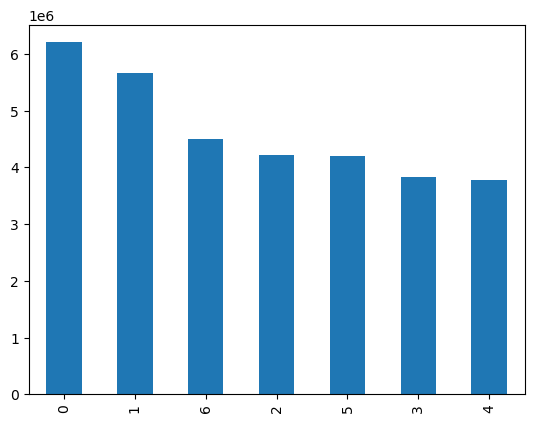

In [7]:
# Create bar chart of orders_day_of_week column
df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

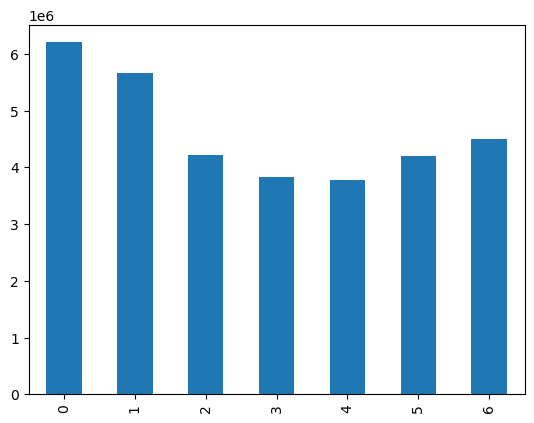

In [8]:
# Sort and save above chart by day of week 
bar = df_ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
# Save 'bar' object to file
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

3. Creating a histogram and scatterplot

<AxesSubplot:ylabel='Frequency'>

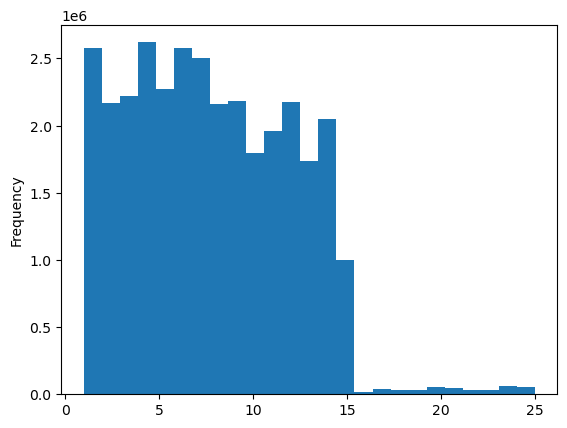

In [10]:
# Create histogram of 'prices' column
df_ords_prods_all['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

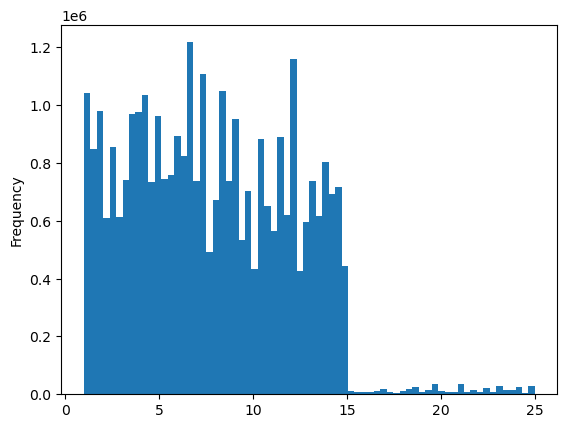

In [11]:
# Create histogram of 'prices' column with 70 bins
df_ords_prods_all['prices'].plot.hist(bins = 70)

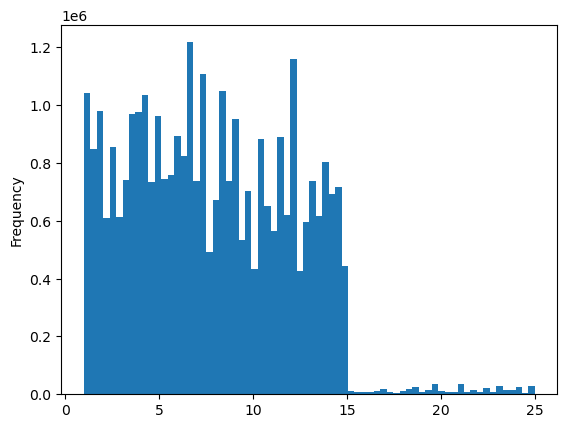

In [12]:
# Save histogram as object 'hist'
hist = df_ords_prods_all['prices'].plot.hist(bins = 70)

In [13]:
# Save 'hist' object to file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

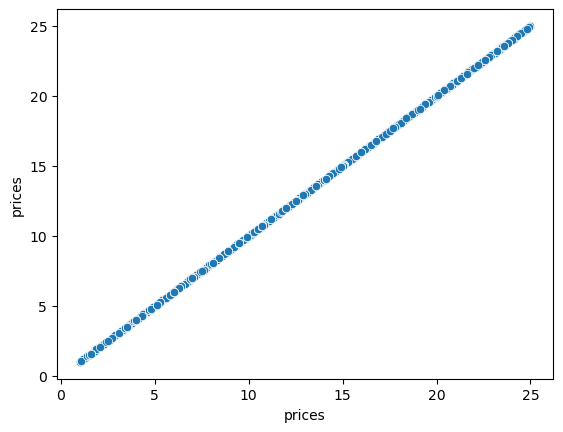

In [14]:
# Create a scatterplot and save to object 'scat'
scat = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_all)

In [15]:
# Save 'scat' object to file
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_prices.png'))

4. Creating a line chart using a sample subset

In [16]:
# Create a list of random floating numbers between 0 and 1, and store as boolean value in new list 'dev' with a 70/30 split
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [17]:
# Check values of 'dev' list
dev

array([False,  True, False, ...,  True,  True,  True])

In [18]:
# Split 'dev' list into two dataframes 'big' and 'small'
big = df_ords_prods_all[dev]
small = df_ords_prods_all[~dev]

In [19]:
# Check length of main dataframe
len(df_ords_prods_all)

32404859

In [20]:
# Check length of 'big' & small' dataframes
len(big) + len(small)

32404859

In [21]:
# Create new dataframe 'df_2' with 2 columns from 'small' dataframe
df_2 = small[['orders_day_of_week', 'prices']]

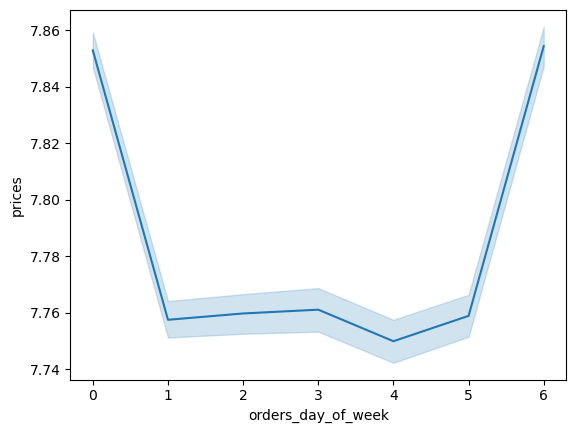

In [22]:
# Create line chart of sample dataframe 'df_2'
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [23]:
# Save 'line' object to file
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow_small.png'))

5. Creating a histogram of 'order_time_of_day' column

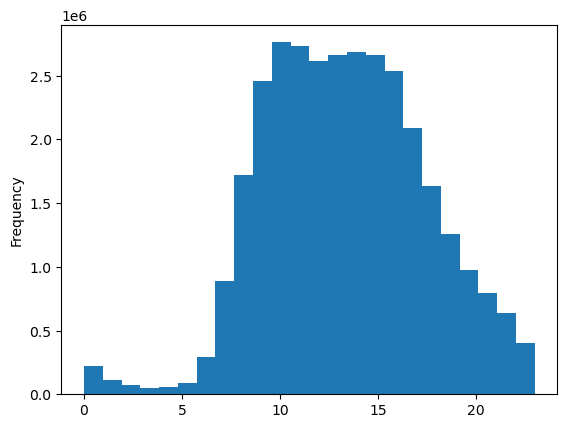

In [24]:
# Create histogram of 'order_time_of_day' column and save as object 'hist_2'
hist_2 = df_ords_prods_all['order_time_of_day'].plot.hist(bins = 24)

The histogram represents the frequency that each time of day occurs in the dataframe (most orders occur between 10am and 4pm, with the most at 10am)

In [25]:
# Save 'hist_2' object to file
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_tod.png'))

6. Creating a bar chart from the 'loyalty_flag' column

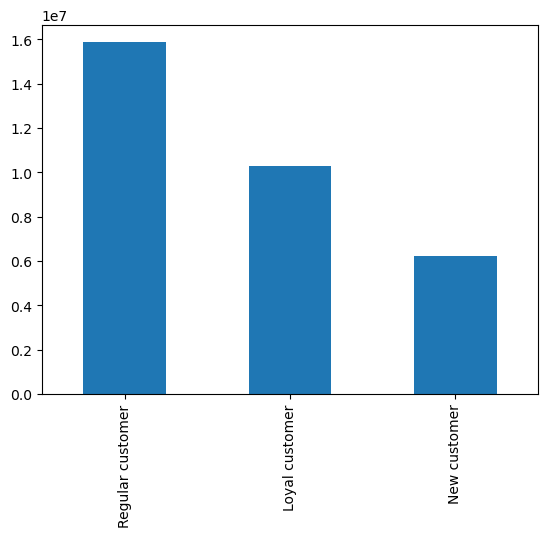

In [26]:
# Create bar chart of 'loyalty_flag' column and save as object 'bar_2'
bar_2 = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar()

In [27]:
# Save 'bar_2' object to file
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

7. Checking for difference in expenditures based on time of day

In [28]:
# Create new dataframe 'df_4' with 2 columns from 'small' dataframe
df_4 = small[['order_time_of_day', 'prices']]

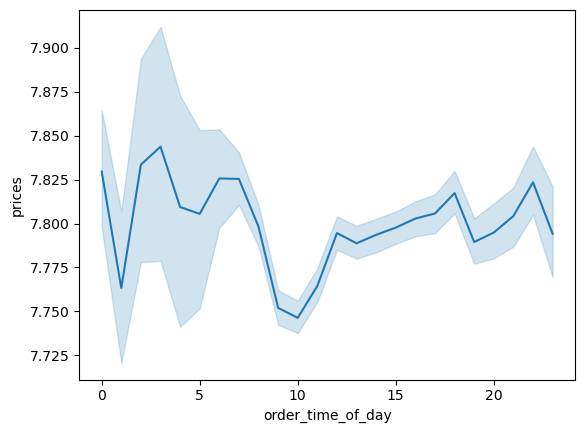

In [29]:
# Create line chart from sample dataframe 'df_4' and save to object 'line_2'
line_2 = sns.lineplot(data = df_4, x = 'order_time_of_day',y = 'prices')

In [30]:
#Check frequency of 'order_time_of_day' column
df_ords_prods_all['order_time_of_day'].value_counts(dropna = False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_time_of_day, dtype: int64

The above graph shows that most money is spent very early in the morning (around 3am), even though most orders occur between 10am and 4pm. Therefore, they must be higher value purchases.

In [31]:
# Save 'line_2' object to file
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_tod_small.png'))

8. Exploring customer demographics with line chart and scatterplot

In [32]:
# Create new dataframe 'df_6' with 2 columns from 'small' dataframe
df_6 = small[['age', 'number_of_dependents']]

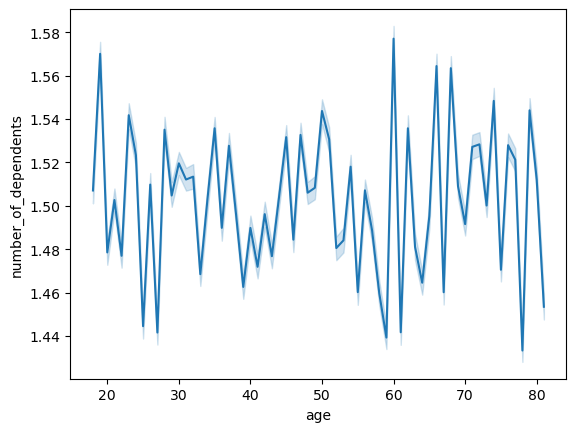

In [33]:
# Create line chart from sample dataframe 'df_6' and save to object 'line_3'
line_3 = sns.lineplot(data = df_6, x = 'age',y = 'number_of_dependents')

The line chart shows that number of dependents varies with age in an unpredictable way. 60-year-old customers have the most number of dependents.

In [34]:
#Check frequency of 'number_of_dependents' column in entire dataframe
df_ords_prods_all['number_of_dependents'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: number_of_dependents, dtype: int64

In [35]:
#Check frequency of 'number_of_dependents' column in 'small' dataframe
small['number_of_dependents'].value_counts(dropna = False)

3    2440208
2    2428233
0    2427640
1    2425017
Name: number_of_dependents, dtype: int64

In [36]:
# Check statistics of 'small' dataframe
small.describe()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price,median_days_since_prior_order,age,number_of_dependents,income
count,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9721098.0,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.721098e+06,9.719550e+06,9.721098e+06,9.721098e+06,9721098.0,9.721098e+06,9.721098e+06,9.721098e+06
mean,1.710477e+06,1.029318e+05,1.713443e+01,2.738846e+00,1.342589e+01,NaN,2.559828e+04,8.351788e+00,5.896168e-01,6.450376e+01,9.921589e+00,7.793339e+00,3.304217e+01,1.209614e+01,NaN,4.946128e+01,1.502105e+00,9.942981e+04
std,9.875365e+05,5.946742e+04,1.753214e+01,2.090167e+00,4.245184e+00,0.0,1.408297e+04,7.123294e+00,4.919033e-01,4.842222e+01,6.281688e+00,4.219113e+00,2.516086e+01,8.383915e+01,0.0,1.848547e+01,1.118703e+00,4.303434e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.0,1.000000e+00,1.000000e+00,0.000000e+00,-1.280000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.0,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.553740e+05,5.139300e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.0,1.354800e+04,3.000000e+00,0.000000e+00,2.400000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387151e+00,6.0,3.300000e+01,1.000000e+00,6.700900e+04
50%,1.710295e+06,1.026390e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.0,2.528300e+04,6.000000e+00,1.000000e+00,7.900000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824894e+00,7.0,4.900000e+01,2.000000e+00,9.661800e+04
75%,2.565525e+06,1.543850e+05,2.400000e+01,5.000000e+00,1.600000e+01,14.0,3.794700e+04,1.100000e+01,1.000000e+00,1.000000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254255e+00,12.0,6.500000e+01,3.000000e+00,1.278940e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.400000e+02,1.000000e+00,1.270000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500543e+04,30.0,8.100000e+01,3.000000e+00,5.939010e+05


In [37]:
# Save 'line_3' object to file
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents_small.png'))

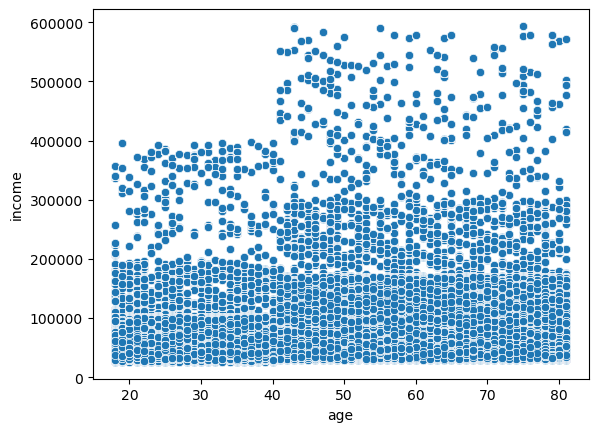

In [38]:
# Create a scatterplot of age vs income from small dataframe and save to object 'scat_2'
scat_2 = sns.scatterplot(x = 'age', y = 'income',data = small)

The scatterplot shows that the vast majority of customers earn income below 200,000. There does not seem to be a direct correlation between age and income - some younger customers have high salaries and some older customers have low salaries. However, on the whole, as age increases, income increases - more customers that are between the ages of 40 and 80 earn between 200,000 and 400,000, then customers below 40. Also, only customers above 40 earn over 400,000. 

In [39]:
# Save 'scat_2' object to file
scat_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income_small.png'))